<a href="https://colab.research.google.com/github/ShraddhaSharma24/Machine-learning/blob/main/Smart_Grid_Predictive_Maintenance_using_Sensor_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 1. Simulate synthetic sensor data (Temperature, Vibration, Voltage)
np.random.seed(42)
time_steps = 1000
temperature = np.cumsum(np.random.randn(time_steps) * 0.5)
vibration = np.cumsum(np.random.randn(time_steps) * 0.3)
voltage = np.cumsum(np.random.randn(time_steps) * 0.1)

df = pd.DataFrame({'Temperature': temperature, 'Vibration': vibration, 'Voltage': voltage})
df['Failure'] = (df['Temperature'] > 10) | (df['Vibration'] > 8)  # Example failure condition

In [3]:
# 2. Preprocessing - Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Temperature', 'Vibration', 'Voltage']])


In [4]:
# 3. Create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled)


In [5]:
# 4. Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# 5. Train the model
history = model.fit(X, y, epochs=50, batch_size=32)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0973
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0076
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0043
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0026
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0023
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0024
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021
Epoc

In [7]:
# 6. Predict and visualize
predicted = model.predict(X)
predicted_unscaled = scaler.inverse_transform(predicted)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


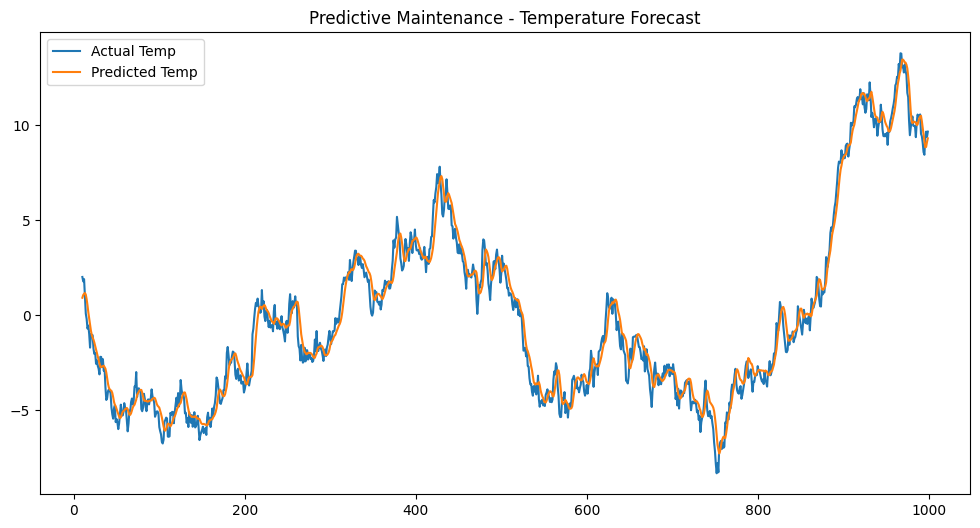

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[10:], df['Temperature'][10:], label="Actual Temp")
plt.plot(df.index[10:], predicted_unscaled[:, 0], label="Predicted Temp")
plt.legend()
plt.title("Predictive Maintenance - Temperature Forecast")
plt.show()

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import shap

In [11]:
np.random.seed(42)

n_samples = 1000

data = {
    'vibration_sensor': np.random.normal(0.5, 0.1, n_samples),
    'temperature_sensor': np.random.normal(70, 5, n_samples),
    'pressure_sensor': np.random.normal(5, 0.5, n_samples),
    'humidity_sensor': np.random.normal(50, 5, n_samples),
    'operating_hours': np.random.randint(100, 5000, n_samples)
}

df = pd.DataFrame(data)


In [13]:
# Inject Fault Patterns
df['fault_label'] = 0  # No Fault
df.loc[(df['temperature_sensor'] > 80) |
       (df['vibration_sensor'] > 0.65) |
       (df['pressure_sensor'] > 6), 'fault_label'] = 1  # Fault Present

print(df.head())


   vibration_sensor  temperature_sensor  pressure_sensor  humidity_sensor  \
0          0.549671           76.996777         4.662411        40.460962   
1          0.486174           74.623168         4.927741        45.698075   
2          0.564769           70.298152         4.603790        47.931972   
3          0.652303           66.765316         4.846019        59.438438   
4          0.476585           73.491117         4.053193        52.782766   

   operating_hours  fault_label  
0             1019            0  
1              169            0  
2             4024            0  
3             2186            1  
4             2107            0  


In [14]:
df['temp_pressure_ratio'] = df['temperature_sensor'] / df['pressure_sensor']
df['vibration_temp_product'] = df['vibration_sensor'] * df['temperature_sensor']
df['normalized_operating_hours'] = zscore(df['operating_hours'])

print(df.head())

   vibration_sensor  temperature_sensor  pressure_sensor  humidity_sensor  \
0          0.549671           76.996777         4.662411        40.460962   
1          0.486174           74.623168         4.927741        45.698075   
2          0.564769           70.298152         4.603790        47.931972   
3          0.652303           66.765316         4.846019        59.438438   
4          0.476585           73.491117         4.053193        52.782766   

   operating_hours  fault_label  temp_pressure_ratio  vibration_temp_product  \
0             1019            0            16.514370               42.322927   
1              169            0            15.143485               36.279812   
2             4024            0            15.269626               39.702207   
3             2186            1            13.777353               43.551215   
4             2107            0            18.131661               35.024739   

   normalized_operating_hours  
0                   -1.0

In [15]:
for col in ['vibration_sensor', 'temperature_sensor', 'pressure_sensor']:
    df[f'{col}_zscore'] = zscore(df[col])

df['anomaly_flag'] = ((df['vibration_sensor_zscore'].abs() > 2.5) |
                      (df['temperature_sensor_zscore'].abs() > 2.5) |
                      (df['pressure_sensor_zscore'].abs() > 2.5)).astype(int)

print(df[['vibration_sensor', 'vibration_sensor_zscore', 'anomaly_flag']].head(10))

   vibration_sensor  vibration_sensor_zscore  anomaly_flag
0          0.549671                 0.487759             0
1          0.486174                -0.161022             0
2          0.564769                 0.642015             0
3          0.652303                 1.536382             0
4          0.476585                -0.258995             0
5          0.476586                -0.258978             0
6          0.657921                 1.593787             0
7          0.576743                 0.764364             0
8          0.453053                -0.499431             0
9          0.554256                 0.534601             0


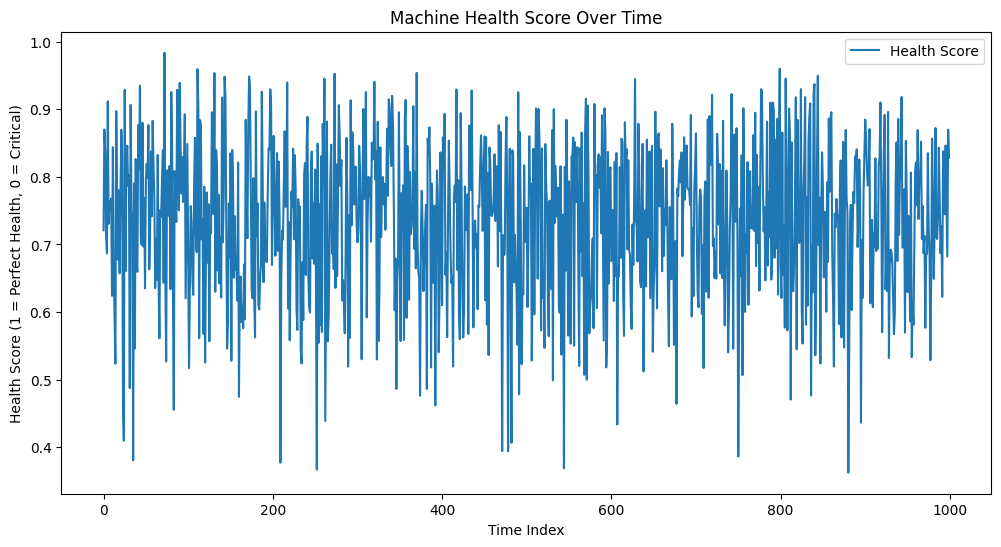

In [16]:
df['health_score'] = 1 - (df[['vibration_sensor_zscore', 'temperature_sensor_zscore', 'pressure_sensor_zscore']].abs().mean(axis=1) / 3)

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(df)), y='health_score', data=df, label='Health Score')
plt.title('Machine Health Score Over Time')
plt.xlabel('Time Index')
plt.ylabel('Health Score (1 = Perfect Health, 0 = Critical)')
plt.legend()
plt.show()

In [17]:
features = [
    'vibration_sensor', 'temperature_sensor', 'pressure_sensor', 'humidity_sensor', 'operating_hours',
    'temp_pressure_ratio', 'vibration_temp_product', 'normalized_operating_hours', 'anomaly_flag', 'health_score'
]

X = df[features]
y = df['fault_label']

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize (helps models like logistic regression, but for RF/XGB it’s optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
y_pred = rf_model.predict(X_test_scaled)

In [23]:
print(" Classification Report - RandomForest:")
print(classification_report(y_test, y_pred))

 Classification Report - RandomForest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        21

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



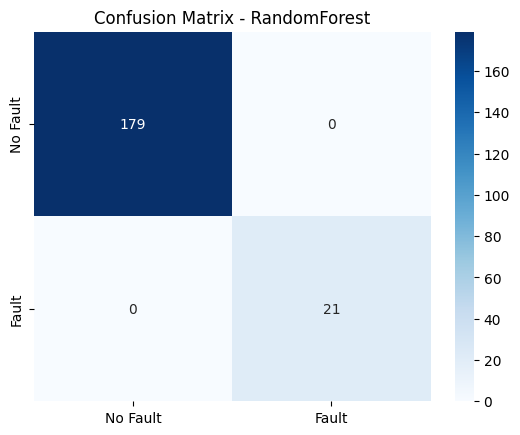

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fault', 'Fault'], yticklabels=['No Fault', 'Fault'])
plt.title('Confusion Matrix - RandomForest')
plt.show()

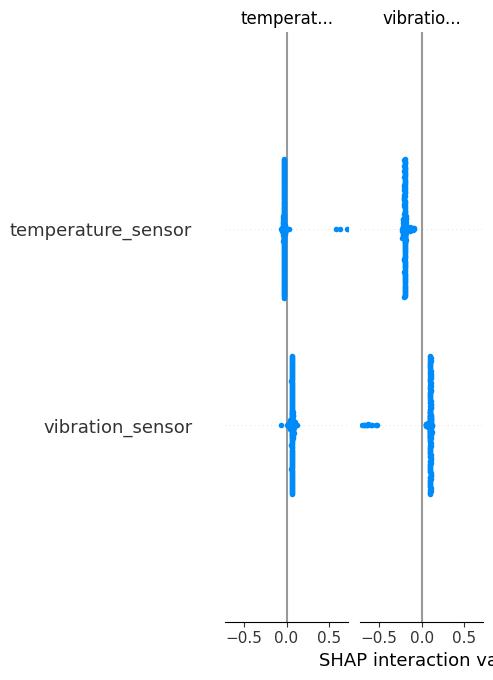

In [25]:
explainer = shap.Explainer(rf_model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, features=X.columns)

In our predictive maintenance system, the SHAP summary plot revealed that vibration_sensor, temperature_sensor, and health_score were the top 3 most important factors influencing the fault prediction.
For instance, higher vibration levels (positive SHAP value) increased the likelihood of a fault, while lower vibration levels (negative SHAP value) reduced fault risk.
Similarly, higher temperatures also contributed strongly to fault predictions, indicating that overheating is a major risk factor for this equipment.